## Data Wrangling On White Wine Checmical Composition And Quality Data
****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filename = 'winequality-white.csv' 
df = pd.read_csv(filename, sep=';')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The dataframe show no null values. Next step would be finding outliers.

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The max row shows some abnormally high values in almost all of the chemical attributes compared to the mean and 75% quartile. Next, scatter plot will be used to verify those outliers.

In [5]:
%matplotlib inline

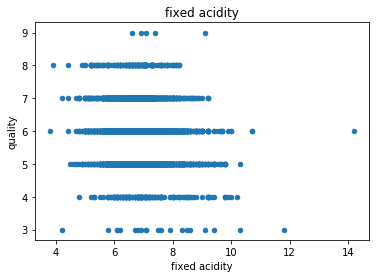

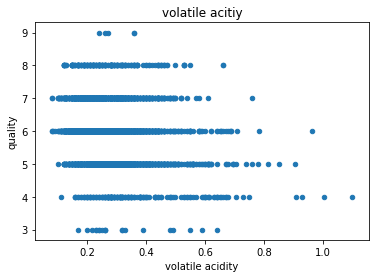

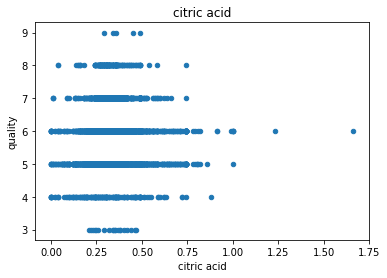

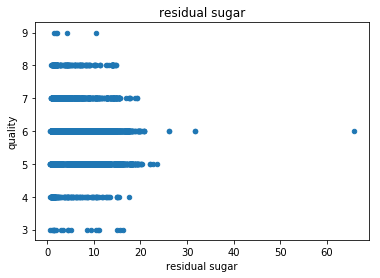

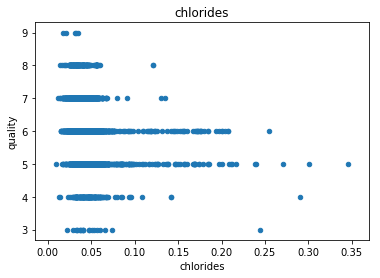

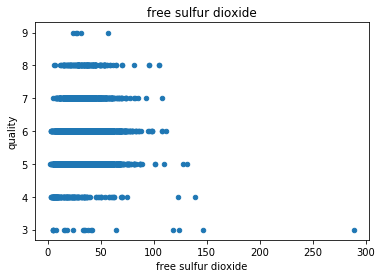

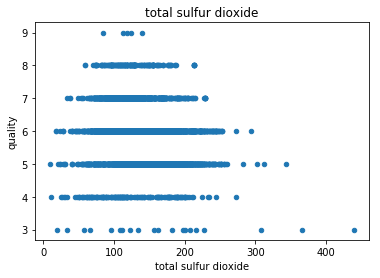

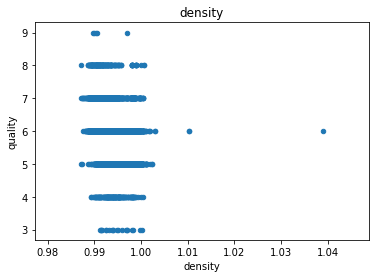

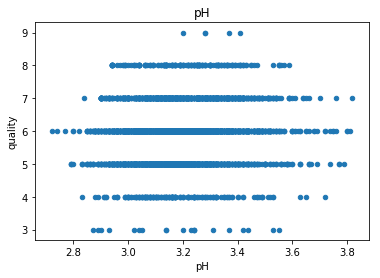

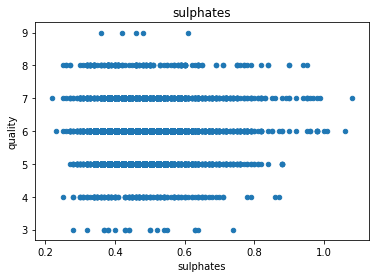

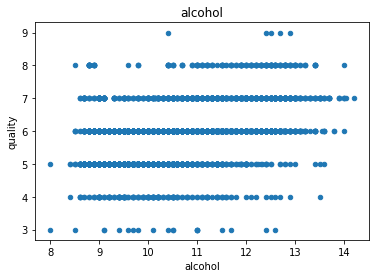

In [6]:
df.plot.scatter(y='quality', x='fixed acidity',title='fixed acidity')
df.plot.scatter(y='quality',x='volatile acidity',title='volatile acitiy')
df.plot.scatter(y='quality',x='citric acid',title='citric acid')
df.plot.scatter(y='quality',x='residual sugar',title='residual sugar')
df.plot.scatter(y='quality',x='chlorides',title='chlorides')
df.plot.scatter(y='quality',x='free sulfur dioxide',title='free sulfur dioxide')
df.plot.scatter(y='quality',x='total sulfur dioxide',title='total sulfur dioxide')
df.plot.scatter(y='quality',x='density',title='density')
df.plot.scatter(y='quality',x='pH',title='pH')
df.plot.scatter(y='quality',x='sulphates',title='sulphates')
df.plot.scatter(y='quality',x='alcohol',title='alcohol')

After looking at the scatter plots of each chemical attributes by quality scores, there are visible outliers with high fixed acidity, citric acid, residual sugar, free sulfur dioxide, and density. Next, the outliers will be examined by their total composition to see if they are typos or just samples with unusual chemical composition.

In [7]:
df.loc[df['free sulfur dioxide']>200]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


The outlier sample of free sulfur dioxide also shows the highest total sulfur dioxide, thus proves the value is not typo but rather true.

In [8]:
df.loc[df['residual sugar']>60]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


The outlier of residual sugar that has the highest value also shows the highest density. Because residual sugar and density are positively correlated, the outlier value is not considered a typo.

In [9]:
df.loc[df['citric acid']>1.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
745,7.4,0.2,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6


The outlier on citric acid has relatively low volatile acidity and average fixed acidity. It is possible that the wine had low amount of acid to begin with and then citric acid was added to boost the total acid in the wine.

In [10]:
df.loc[df['fixed acidity']>11]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1526,14.2,0.27,0.49,1.1,0.037,33.0,156.0,0.9920,3.15,0.54,11.1,6
2050,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.9997,2.93,0.55,9.7,3


The outlier of fixed acidity has high amount of fixed acid while volatile acidity and citric acid amount are on average. Despite high fixed acid in sample, the pH value is relatively on the average because acid values are measured on linear basis and pH is an expoential measurement. Therefore, the outliner sample is still considered acceptable.

****
### Final thought

There are several outliers in various chemical attributes. After analyze their chemical components, they can be kept as samples with unusual chemcial composition rather than removing them from the analysis.